In [88]:
var openDigger = require('../src/open_digger');

In [89]:
var query = openDigger.driver.clickhouse.query;
query(    
    `SHOW DATABASES`
).then(
    res=>{  console.log(res); }
)

[
  { name: '_temporary_and_external_tables' },
  { name: 'default' },
  { name: 'github_log' },
  { name: 'system' }
]


### 1.1 每月新增的star数

[
  { m: '2017-02', cnt: '51' },
  { m: '2017-03', cnt: '2939' },
  { m: '2017-04', cnt: '542' },
  { m: '2017-05', cnt: '1126' },
  { m: '2017-06', cnt: '732' },
  { m: '2017-07', cnt: '360' },
  { m: '2017-08', cnt: '324' },
  { m: '2017-09', cnt: '222' },
  { m: '2017-10', cnt: '220' },
  { m: '2017-11', cnt: '522' },
  { m: '2017-12', cnt: '262' },
  { m: '2018-01', cnt: '239' },
  { m: '2018-02', cnt: '181' },
  { m: '2018-03', cnt: '256' },
  { m: '2018-04', cnt: '151' },
  { m: '2018-05', cnt: '164' },
  { m: '2018-06', cnt: '134' },
  { m: '2018-07', cnt: '148' },
  { m: '2018-08', cnt: '151' },
  { m: '2018-09', cnt: '120' },
  { m: '2018-10', cnt: '114' },
  { m: '2018-11', cnt: '128' },
  { m: '2018-12', cnt: '112' },
  { m: '2019-01', cnt: '105' },
  { m: '2019-02', cnt: '121' },
  { m: '2019-03', cnt: '190' },
  { m: '2019-04', cnt: '158' },
  { m: '2019-05', cnt: '146' },
  { m: '2019-06', cnt: '105' },
  { m: '2019-07', cnt: '115' },
  { m: '2019-08', cnt: '106' },
  { m

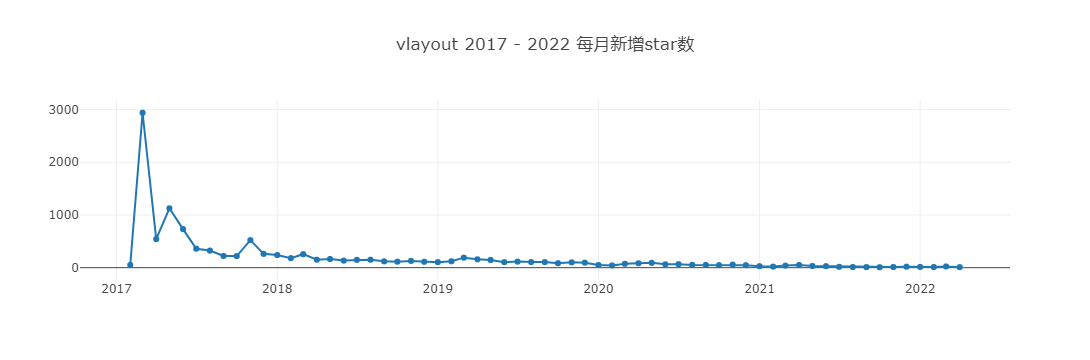

In [91]:
var startYear = 2017, endYear = 2022;
var years = [];
for (var y = startYear; y <= endYear; y++) years.push(y);
Promise.all(
    years.map(year => { return openDigger.driver.clickhouse.query(`
    select formatDateTime(created_at, '%Y-%m') as m, count(*) as cnt
    from github_log.year${year} 
    where repo_name = 'alibaba/vlayout'
    and type='WatchEvent'
    group by formatDateTime(created_at, '%Y-%m')
    order by formatDateTime(created_at, '%Y-%m')
    `)})
).then(
    data => {
    // console.log(data);
    data1 = data.reduce(function (a, b) { return a.concat(b)} );
    console.log(data1)
    openDigger.render.plotly([
        {y: data1.map(d => d.cnt), x: data1.map(d => d.m), mode: 'lines+markers', name: 'activity'}
    ], {title: `vlayout ${startYear} - ${endYear} 每月新增star数`});  
})

### 1.2 每月新的fork数

[
  { m: '2017-02', cnt: '6' },
  { m: '2017-03', cnt: '434' },
  { m: '2017-04', cnt: '105' },
  { m: '2017-05', cnt: '243' },
  { m: '2017-06', cnt: '153' },
  { m: '2017-07', cnt: '78' },
  { m: '2017-08', cnt: '52' },
  { m: '2017-09', cnt: '46' },
  { m: '2017-10', cnt: '56' },
  { m: '2017-11', cnt: '95' },
  { m: '2017-12', cnt: '55' },
  { m: '2018-01', cnt: '47' },
  { m: '2018-02', cnt: '37' },
  { m: '2018-03', cnt: '48' },
  { m: '2018-04', cnt: '31' },
  { m: '2018-05', cnt: '22' },
  { m: '2018-06', cnt: '22' },
  { m: '2018-07', cnt: '36' },
  { m: '2018-08', cnt: '27' },
  { m: '2018-09', cnt: '22' },
  { m: '2018-10', cnt: '26' },
  { m: '2018-11', cnt: '21' },
  { m: '2018-12', cnt: '24' },
  { m: '2019-01', cnt: '13' },
  { m: '2019-02', cnt: '14' },
  { m: '2019-03', cnt: '19' },
  { m: '2019-04', cnt: '29' },
  { m: '2019-05', cnt: '26' },
  { m: '2019-06', cnt: '24' },
  { m: '2019-07', cnt: '19' },
  { m: '2019-08', cnt: '16' },
  { m: '2019-09', cnt: '26' },
  {

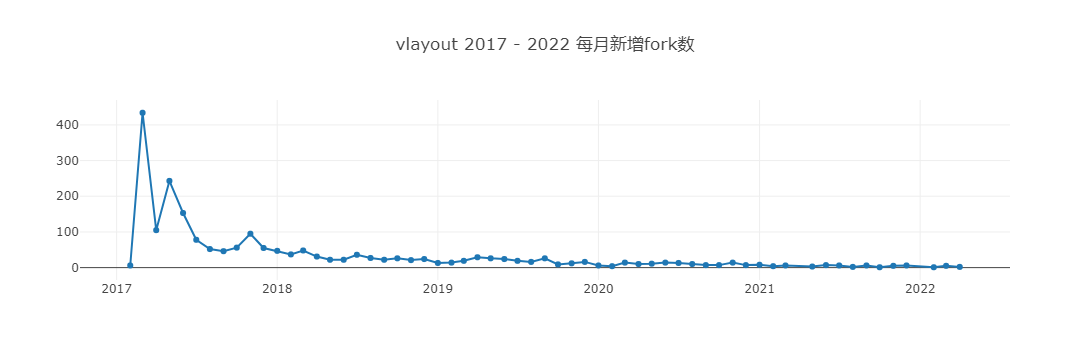

In [91]:
var startYear = 2017, endYear = 2022;
var years = [];
for (var y = startYear; y <= endYear; y++) years.push(y);
Promise.all(
    years.map(year => { return openDigger.driver.clickhouse.query(`
    select formatDateTime(created_at, '%Y-%m') as m, count(*) as cnt
    from github_log.year${year} 
    where repo_name = 'alibaba/vlayout'
    and type='ForkEvent'
    group by formatDateTime(created_at, '%Y-%m')
    order by formatDateTime(created_at, '%Y-%m')
    `)})
).then(
    data => {
    // console.log(data);
    data1 = data.reduce(function (a, b) { return a.concat(b)} );
    console.log(data1)
    openDigger.render.plotly([
        {y: data1.map(d => d.cnt), x: data1.map(d => d.m), mode: 'lines+markers', name: 'activity'}
    ], {title: `vlayout ${startYear} - ${endYear} 每月新增fork数`});  
})

### 2.1 每月打开的issue个数

[
  { m: '2017-03', cnt: '34' },
  { m: '2017-04', cnt: '12' },
  { m: '2017-05', cnt: '37' },
  { m: '2017-06', cnt: '36' },
  { m: '2017-07', cnt: '36' },
  { m: '2017-08', cnt: '34' },
  { m: '2017-09', cnt: '26' },
  { m: '2017-10', cnt: '18' },
  { m: '2017-11', cnt: '18' },
  { m: '2017-12', cnt: '20' },
  { m: '2018-01', cnt: '15' },
  { m: '2018-02', cnt: '12' },
  { m: '2018-03', cnt: '16' },
  { m: '2018-04', cnt: '16' },
  { m: '2018-05', cnt: '10' },
  { m: '2018-06', cnt: '16' },
  { m: '2018-07', cnt: '7' },
  { m: '2018-08', cnt: '9' },
  { m: '2018-09', cnt: '10' },
  { m: '2018-10', cnt: '3' },
  { m: '2018-11', cnt: '6' },
  { m: '2018-12', cnt: '10' },
  { m: '2019-01', cnt: '2' },
  { m: '2019-02', cnt: '3' },
  { m: '2019-03', cnt: '6' },
  { m: '2019-04', cnt: '8' },
  { m: '2019-05', cnt: '7' },
  { m: '2019-06', cnt: '8' },
  { m: '2019-07', cnt: '4' },
  { m: '2019-08', cnt: '6' },
  { m: '2019-09', cnt: '3' },
  { m: '2019-10', cnt: '3' },
  { m: '2019-11', cn

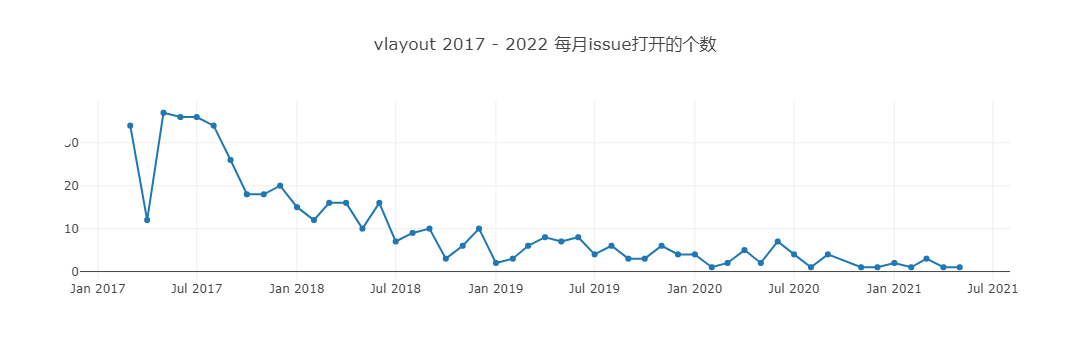

In [92]:
var startYear = 2017, endYear = 2022;
var years = [];
for (var y = startYear; y <= endYear; y++) years.push(y);
Promise.all(
    years.map(year => { return openDigger.driver.clickhouse.query(`
    select formatDateTime(created_at, '%Y-%m') as m, count(*) as cnt
    from github_log.year${year} 
    where repo_name = 'alibaba/vlayout'
    and type='IssuesEvent'
    and action in ['opened', 'reopened']
    group by formatDateTime(created_at, '%Y-%m')
    order by formatDateTime(created_at, '%Y-%m')
    `)})
).then(
    data => {
    // console.log(data);
    data1 = data.reduce(function (a, b) { return a.concat(b)} );
    console.log(data1)
    openDigger.render.plotly([
        {y: data1.map(d => d.cnt), x: data1.map(d=>d.m), mode: 'lines+markers', name: 'activity'}
    ], {title: `vlayout ${startYear} - ${endYear} 每月issue打开的个数`});  
})

### 2.2 每月关闭的issue个数

[
  { m: '2017-03', cnt: '26' },
  { m: '2017-04', cnt: '4' },
  { m: '2017-05', cnt: '32' },
  { m: '2017-06', cnt: '17' },
  { m: '2017-07', cnt: '35' },
  { m: '2017-08', cnt: '30' },
  { m: '2017-09', cnt: '13' },
  { m: '2017-10', cnt: '8' },
  { m: '2017-11', cnt: '6' },
  { m: '2017-12', cnt: '32' },
  { m: '2018-01', cnt: '22' },
  { m: '2018-02', cnt: '13' },
  { m: '2018-03', cnt: '14' },
  { m: '2018-04', cnt: '10' },
  { m: '2018-05', cnt: '3' },
  { m: '2018-06', cnt: '9' },
  { m: '2018-07', cnt: '19' },
  { m: '2018-09', cnt: '2' },
  { m: '2018-11', cnt: '1' },
  { m: '2018-12', cnt: '3' },
  { m: '2019-01', cnt: '2' },
  { m: '2019-03', cnt: '1' },
  { m: '2019-04', cnt: '2' },
  { m: '2019-05', cnt: '1' },
  { m: '2019-06', cnt: '1' },
  { m: '2019-07', cnt: '1' },
  { m: '2019-10', cnt: '4' },
  { m: '2019-11', cnt: '1' },
  { m: '2020-01', cnt: '2' },
  { m: '2020-03', cnt: '1' },
  { m: '2020-06', cnt: '1' },
  { m: '2020-07', cnt: '1' },
  { m: '2020-09', cnt: '1'

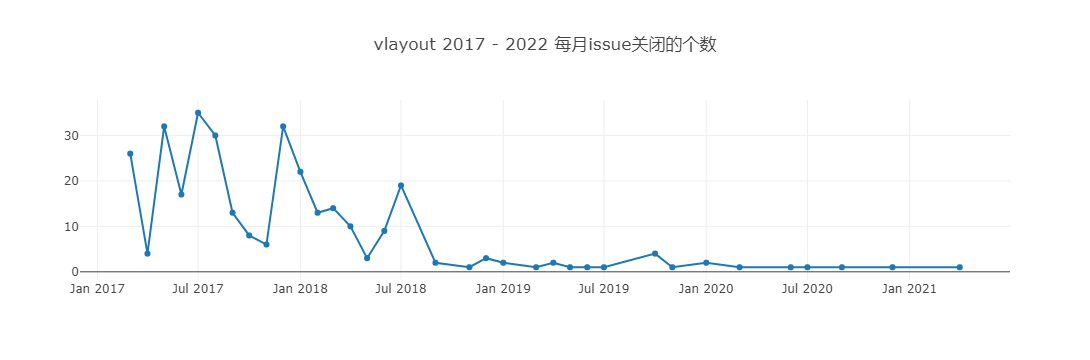

In [94]:
var startYear = 2017, endYear = 2022;
var years = [];
for (var y = startYear; y <= endYear; y++) years.push(y);
Promise.all(
    years.map(year => { return openDigger.driver.clickhouse.query(`
    select formatDateTime(created_at, '%Y-%m') as m, count(*) as cnt
    from github_log.year${year} 
    where repo_name = 'alibaba/vlayout'
    and type='IssuesEvent'
    and action='closed'
    group by formatDateTime(created_at, '%Y-%m')
    order by formatDateTime(created_at, '%Y-%m')
    `)})
).then(
    data => {
    // console.log(data);
    data1 = data.reduce(function (a, b) { return a.concat(b)} );
    console.log(data1)
    openDigger.render.plotly([
        {y: data1.map(d => d.cnt), x: data1.map(d=>d.m), mode: 'lines+markers', name: 'activity'}
    ], {title: `vlayout ${startYear} - ${endYear} 每月issue关闭的个数`});  
})

### 3.1 每月打开的PR个数

[
  { m: '2017-03', cnt: '3' },
  { m: '2017-05', cnt: '2' },
  { m: '2017-06', cnt: '1' },
  { m: '2017-07', cnt: '1' },
  { m: '2017-11', cnt: '2' },
  { m: '2017-12', cnt: '2' },
  { m: '2018-02', cnt: '1' },
  { m: '2018-03', cnt: '1' },
  { m: '2018-05', cnt: '2' },
  { m: '2019-01', cnt: '1' },
  { m: '2019-03', cnt: '1' },
  { m: '2019-05', cnt: '1' },
  { m: '2019-09', cnt: '1' },
  { m: '2019-12', cnt: '1' },
  { m: '2020-07', cnt: '1' }
]


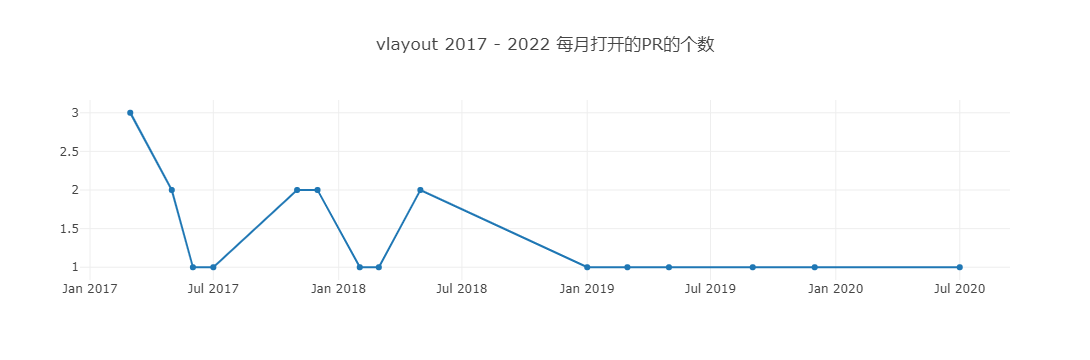

In [95]:
var startYear = 2017, endYear = 2022;
var years = [];
for (var y = startYear; y <= endYear; y++) years.push(y);
Promise.all(
    years.map(year => { return openDigger.driver.clickhouse.query(`
    select formatDateTime(created_at, '%Y-%m') as m, count(*) as cnt
    from github_log.year${year} 
    where repo_name = 'alibaba/vlayout'
    and type='PullRequestEvent'
    and action= 'opened'
    group by formatDateTime(created_at, '%Y-%m')
    order by formatDateTime(created_at, '%Y-%m')
    `)})
).then(
    data => {
    // console.log(data);
    data1 = data.reduce(function (a, b) { return a.concat(b)} );
    console.log(data1)
    openDigger.render.plotly([
        {y: data1.map(d => d.cnt), x: data1.map(d=>d.m), mode: 'lines+markers', name: 'activity'}
    ], {title: `vlayout ${startYear} - ${endYear} 每月打开的PR的个数`});  
})

### 3.3 每月合入PR的个数

[
  { m: '2017-03', cnt: '2' },
  { m: '2017-05', cnt: '2' },
  { m: '2017-06', cnt: '1' },
  { m: '2017-11', cnt: '1' },
  { m: '2017-12', cnt: '2' },
  { m: '2018-02', cnt: '1' },
  { m: '2018-03', cnt: '1' },
  { m: '2018-04', cnt: '1' },
  { m: '2018-05', cnt: '1' },
  { m: '2019-01', cnt: '1' }
]


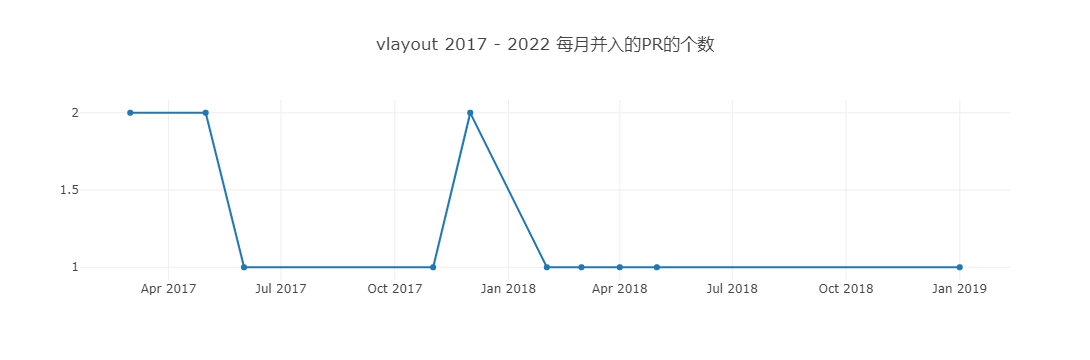

In [96]:
var startYear = 2017, endYear = 2022;
var years = [];
for (var y = startYear; y <= endYear; y++) years.push(y);
Promise.all(
    years.map(year => { return openDigger.driver.clickhouse.query(`
    select formatDateTime(created_at, '%Y-%m') as m, count(*) as cnt
    from github_log.year${year} 
    where repo_name = 'alibaba/vlayout'
    and type='PullRequestEvent'
    and pull_merged=1
    group by formatDateTime(created_at, '%Y-%m')
    order by formatDateTime(created_at, '%Y-%m')
    `)})
).then(
    data => {
    // console.log(data);
    data1 = data.reduce(function (a, b) { return a.concat(b)} );
    console.log(data1)
    openDigger.render.plotly([
        {y: data1.map(d => d.cnt), x: data1.map(d=>d.m), mode: 'lines+markers', name: 'activity'}
    ], {title: `vlayout ${startYear} - ${endYear} 每月并入的PR的个数`});  
})

### 4.1 没有仓库中活跃的不同开发者总数

[
  { m: '2017-03', cnt: '34' },
  { m: '2017-04', cnt: '12' },
  { m: '2017-05', cnt: '36' },
  { m: '2017-06', cnt: '40' },
  { m: '2017-07', cnt: '40' },
  { m: '2017-08', cnt: '36' },
  { m: '2017-09', cnt: '35' },
  { m: '2017-10', cnt: '26' },
  { m: '2017-11', cnt: '27' },
  { m: '2017-12', cnt: '29' },
  { m: '2018-01', cnt: '28' },
  { m: '2018-02', cnt: '22' },
  { m: '2018-03', cnt: '21' },
  { m: '2018-04', cnt: '18' },
  { m: '2018-05', cnt: '20' },
  { m: '2018-06', cnt: '17' },
  { m: '2018-07', cnt: '10' },
  { m: '2018-08', cnt: '13' },
  { m: '2018-09', cnt: '15' },
  { m: '2018-10', cnt: '13' },
  { m: '2018-11', cnt: '18' },
  { m: '2018-12', cnt: '16' },
  { m: '2019-01', cnt: '12' },
  { m: '2019-02', cnt: '6' },
  { m: '2019-03', cnt: '10' },
  { m: '2019-04', cnt: '10' },
  { m: '2019-05', cnt: '20' },
  { m: '2019-06', cnt: '13' },
  { m: '2019-07', cnt: '10' },
  { m: '2019-08', cnt: '16' },
  { m: '2019-09', cnt: '8' },
  { m: '2019-10', cnt: '4' },
  { m: '2

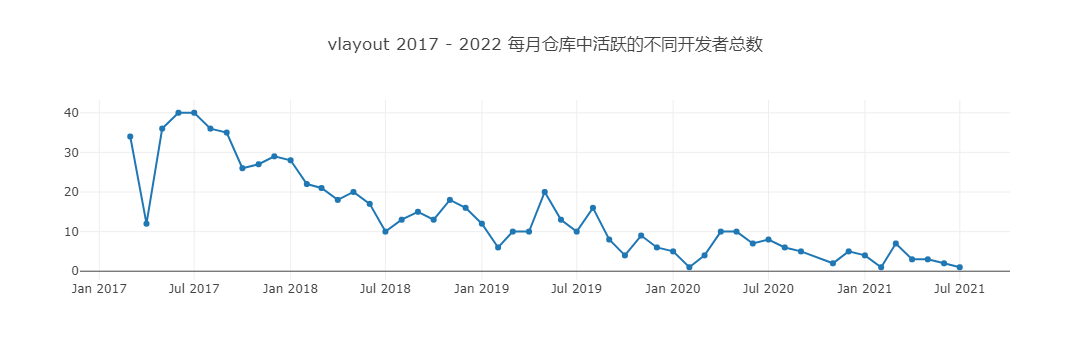

In [97]:
var startYear = 2017, endYear = 2022;
var years = [];
for (var y = startYear; y <= endYear; y++) years.push(y);
Promise.all(
    years.map(year => { return openDigger.driver.clickhouse.query(`
    select formatDateTime(created_at, '%Y-%m') as m, count(distinct actor_id) as cnt
    from github_log.year${year} 
    where repo_name = 'alibaba/vlayout'
    and type in ['IssueCommentEvent', 'IssuesEvent', 'PullRequestEvent', 'PullRequestReviewCommentEvent']
    group by formatDateTime(created_at, '%Y-%m')
    order by formatDateTime(created_at, '%Y-%m')
    `)})
).then(
    data => {
    // console.log(data);
    data1 = data.reduce(function (a, b) { return a.concat(b)} );
    console.log(data1)
    openDigger.render.plotly([
        {y: data1.map(d => d.cnt), x: data1.map(d=>d.m), mode: 'lines+markers', name: 'activity'}
    ], {title: `vlayout ${startYear} - ${endYear} 每月仓库中活跃的不同开发者总数`});  
})

### 5.1 Issue从打开到关闭的平均时长

[
  { day: '2017-03-06', time: 4.59 },
  { day: '2017-03-07', time: 37.88 },
  { day: '2017-03-08', time: 24.786 },
  { day: '2017-03-09', time: 0.07 },
  { day: '2017-03-10', time: 11.07 },
  { day: '2017-03-11', time: 43.36666666666667 },
  { day: '2017-03-13', time: 1.01 },
  { day: '2017-03-15', time: 1.37 },
  { day: '2017-03-20', time: 154.73 },
  { day: '2017-03-22', time: 22.23 },
  { day: '2017-03-28', time: 3.76 },
  { day: '2017-03-29', time: 23.939999999999998 },
  { day: '2017-03-30', time: 0.71 },
  { day: '2017-04-01', time: 46.6 },
  { day: '2017-04-03', time: 10.97 },
  { day: '2017-04-17', time: 14.13 },
  { day: '2017-04-28', time: 0.71 },
  { day: '2017-05-02', time: 416.8185714285714 },
  { day: '2017-05-04', time: 7.21 },
  { day: '2017-05-05', time: 14.51 },
  { day: '2017-05-06', time: 62.83 },
  { day: '2017-05-10', time: 9.42 },
  { day: '2017-05-13', time: 308.66333333333336 },
  { day: '2017-05-14', time: 57.09 },
  { day: '2017-05-16', time: 94.02 },
  { da

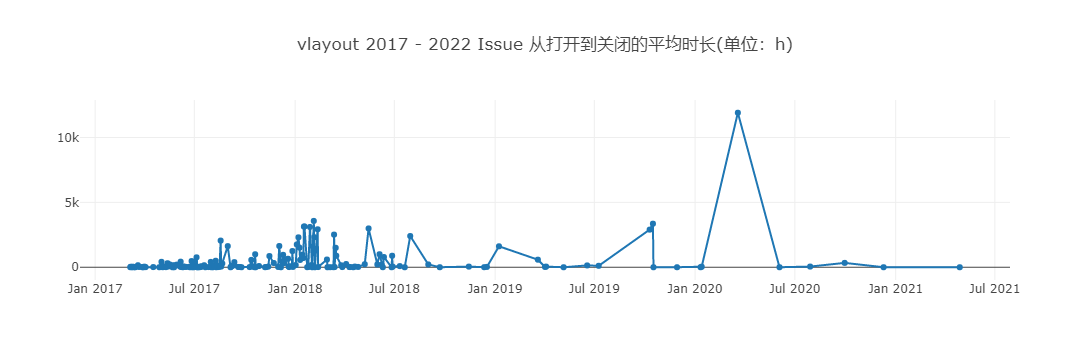

In [97]:
var startYear = 2017, endYear = 2022;
var years = [];
for (var y = startYear; y <= endYear; y++) years.push(y);
Promise.all(
    years.map(year => { return openDigger.driver.clickhouse.query(`
    select formatDateTime(created_at, '%Y-%m-%d') day, avg(round((issue_closed_at - issue_created_at)/3600, 2)) time
    from github_log.year${year}
    where repo_name = 'alibaba/vlayout'
    and type = 'IssuesEvent'
    and action = 'closed'
    group by formatDateTime(created_at, '%Y-%m-%d')
    order by formatDateTime(created_at, '%Y-%m-%d') 
    `)})
).then(
    data => {
    // console.log(data);
    data1 = data.reduce(function (a, b) { return a.concat(b)} );
    console.log(data1)
    openDigger.render.plotly([
        {y: data1.map(d => d.time), x: data1.map(d=>d.day), mode: 'lines+markers', name: 'activity'}
    ], {title: `vlayout ${startYear} - ${endYear} Issue 从打开到关闭的平均时长(单位：h)`});  
})

### 5.2 Issue从打开到关闭的时长中位数

[
  { day: '2017-03-06', time: 2.185 },
  { day: '2017-03-07', time: 38.24 },
  { day: '2017-03-08', time: 17.89 },
  { day: '2017-03-09', time: 0.07 },
  { day: '2017-03-10', time: 11.07 },
  { day: '2017-03-11', time: 41.28 },
  { day: '2017-03-13', time: 1.01 },
  { day: '2017-03-15', time: 1.37 },
  { day: '2017-03-20', time: 154.73 },
  { day: '2017-03-22', time: 22.23 },
  { day: '2017-03-28', time: 3.76 },
  { day: '2017-03-29', time: 23.939999999999998 },
  { day: '2017-03-30', time: 0.71 },
  { day: '2017-04-01', time: 46.6 },
  { day: '2017-04-03', time: 10.97 },
  { day: '2017-04-17', time: 14.13 },
  { day: '2017-04-28', time: 0.71 },
  { day: '2017-05-02', time: 474.9 },
  { day: '2017-05-04', time: 7.21 },
  { day: '2017-05-05', time: 14.51 },
  { day: '2017-05-06', time: 62.83 },
  { day: '2017-05-10', time: 6.49 },
  { day: '2017-05-13', time: 4.57 },
  { day: '2017-05-14', time: 43.16 },
  { day: '2017-05-16', time: 94.02 },
  { day: '2017-05-17', time: 214.39 },
  { d

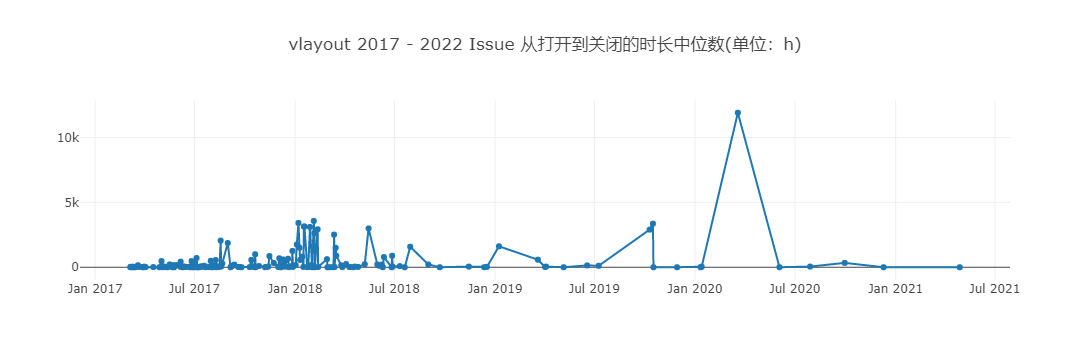

In [99]:
var startYear = 2017, endYear = 2022;
var years = [];
for (var y = startYear; y <= endYear; y++) years.push(y);
Promise.all(
    years.map(year => { return openDigger.driver.clickhouse.query(`
    select formatDateTime(created_at, '%Y-%m-%d') day, (round((issue_closed_at - issue_created_at)/3600, 2)) time
    from github_log.year${year}
    where repo_name = 'alibaba/vlayout'
    and type = 'IssuesEvent'
    and action = 'closed'
    order by formatDateTime(created_at, '%Y-%m-%d'), time
    `)})
).then(
    data => {
    function sortArr(arr, str) {
        var _arr = [],
            _t = [],
            // 临时的变量
            _tmp;
        // 按照特定的参数将数组排序将具有相同值得排在一起
        arr = arr.sort(function(a, b) {
            var s = a[str],
                t = b[str];
            return s < t ? -1 : 1;
        });

        if ( arr.length ){
            _tmp = arr[0][str];
        }
        // 将相同类别的对象添加到统一个数组
        for (var i in arr) {
            if ( arr[i][str] === _tmp ){
                _t.push(arr[i]);
            } else {
                _tmp = arr[i][str];
                _arr.push(_t);
                _t = [arr[i]];
            }
        }
        // 将最后的内容推出新数组
        _arr.push( _t );
        return _arr;
    }
        
    function midNumber(binDimArr){
        var _arr = []
        var _tmp
        for (var i in binDimArr){
            var length = binDimArr[i].length
            if(length % 2 == 0){
                _tmp = binDimArr[i][Math.floor(length/2)]
                _tmp.time = (binDimArr[i][Math.floor(length/2)].time + binDimArr[i][Math.floor(length/2) - 1].time)/2
                _arr.push(_tmp)
            }else{
                _arr.push(binDimArr[i][Math.floor(length/2)])            
            }
        }
        return _arr
    }
    // console.log(data);
    data1 = data.reduce(function (a, b) { return a.concat(b)} );
    // console.log(data1)
    data2 = sortArr(data1, 'day')
    // console.log(data2)
    data3 = midNumber(data2)
    console.log(data3)
    openDigger.render.plotly([
        {y: data3.map(d => d.time), x: data3.map(d=>d.day), mode: 'lines+markers', name: 'activity'}
    ], {title: `vlayout ${startYear} - ${endYear} Issue 从打开到关闭的时长中位数(单位：h)`});  
})

### 6.1 PR从开打到合入的平均时长

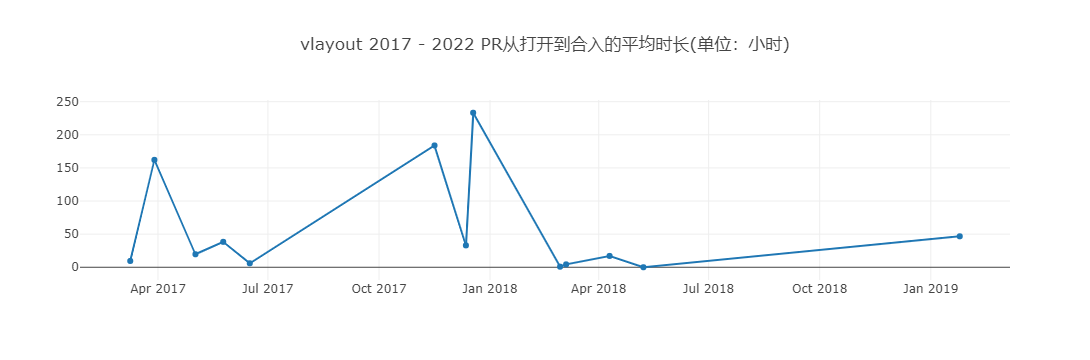

In [99]:
var startYear = 2017, endYear = 2022;
var years = [];
for (var y = startYear; y <= endYear; y++) years.push(y);
Promise.all(
    years.map(year => { return openDigger.driver.clickhouse.query(`
    select formatDateTime(created_at, '%Y-%m-%d') day, avg(round((issue_closed_at - issue_created_at)/3600, 2)) time
    from github_log.year${year}
    where repo_name = 'alibaba/vlayout'
    and type = 'PullRequestEvent'
    and pull_merged = 1
    group by formatDateTime(created_at, '%Y-%m-%d')
    order by formatDateTime(created_at, '%Y-%m-%d') 
    `)})
).then(
    data => {
    // console.log(data);
    data1 = data.reduce(function (a, b) { return a.concat(b)} );
    // console.log(data1)
    openDigger.render.plotly([
        {y: data1.map(d => d.time), x: data1.map(d=>d.day), mode: 'lines+markers', name: 'activity'}
    ], {title: `vlayout ${startYear} - ${endYear} PR从打开到合入的平均时长(单位：小时)`});  
})

### 6.2 PR从打开到合入时长的中位数

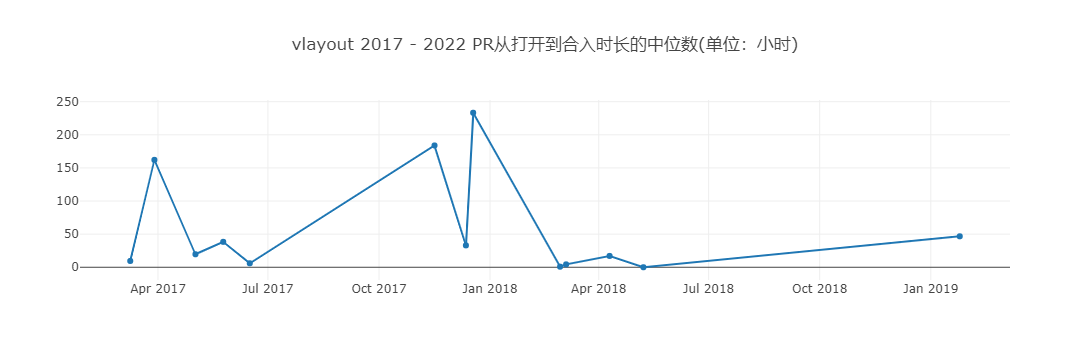

In [100]:
var startYear = 2017, endYear = 2022;
var years = [];
for (var y = startYear; y <= endYear; y++) years.push(y);
Promise.all(
    years.map(year => { return openDigger.driver.clickhouse.query(`
    select formatDateTime(created_at, '%Y-%m-%d') day, round((issue_closed_at - issue_created_at)/3600, 2) time
    from github_log.year${year}
    where repo_name = 'alibaba/vlayout'
    and type = 'PullRequestEvent'
    and pull_merged = 1
    order by formatDateTime(created_at, '%Y-%m-%d'), time  
    `)})
).then(
    data => {
    function sortArr(arr, str) {
        var _arr = [],
            _t = [],
            // 临时的变量
            _tmp;
        // 按照特定的参数将数组排序将具有相同值得排在一起
        arr = arr.sort(function(a, b) {
            var s = a[str],
                t = b[str];
            return s < t ? -1 : 1;
        });

        if ( arr.length ){
            _tmp = arr[0][str];
        }
        // 将相同类别的对象添加到统一个数组
        for (var i in arr) {
            if ( arr[i][str] === _tmp ){
                _t.push(arr[i]);
            } else {
                _tmp = arr[i][str];
                _arr.push(_t);
                _t = [arr[i]];
            }
        }
        // 将最后的内容推出新数组
        _arr.push( _t );
        return _arr;
    }
        
    function midNumber(binDimArr){
        var _arr = []
        var _tmp
        for (var i in binDimArr){
            var length = binDimArr[i].length
            if(length % 2 == 0){
                _tmp = binDimArr[i][Math.floor(length/2)]
                _tmp.time = (binDimArr[i][Math.floor(length/2)].time + binDimArr[i][Math.floor(length/2) - 1].time)/2
                _arr.push(_tmp)
            }else{
                _arr.push(binDimArr[i][Math.floor(length/2)])            
            }
        }
        return _arr
    }
    // console.log(data);
    data1 = data.reduce(function (a, b) { return a.concat(b)} );
    // console.log(data1)
    data2 = sortArr(data1, 'day')
    // console.log(data2)
    data3 = midNumber(data2)
    // console.log(data3)
    openDigger.render.plotly([
        {y: data3.map(d => d.time), x: data3.map(d=>d.day), mode: 'lines+markers', name: 'activity'}
    ], {title: `vlayout ${startYear} - ${endYear} PR从打开到合入时长的中位数(单位：小时)`});  
})

### 7.1 Issue从打开到第一次有人回复的平均时长

[
  { day: '2017-03-06', time: 399.05 },
  { day: '2017-03-07', time: 921.71 },
  { day: '2017-03-08', time: 1501.36 },
  { day: '2017-03-09', time: 183.26 },
  { day: '2017-03-10', time: 344.43 },
  { day: '2017-03-11', time: 1266.25 },
  { day: '2017-03-13', time: 43.38 },
  { day: '2017-03-15', time: 77.58 },
  { day: '2017-03-20', time: 76.48 },
  { day: '2017-03-21', time: 13878.66 },
  { day: '2017-03-22', time: 42.32 },
  { day: '2017-03-28', time: 1967.79 },
  { day: '2017-03-29', time: 1436.22 },
  { day: '2017-03-30', time: 470.68 },
  { day: '2017-03-31', time: 2591.45 },
  { day: '2017-04-01', time: 2704.68 },
  { day: '2017-04-07', time: 7171.29 },
  { day: '2017-04-08', time: 26.85 },
  { day: '2017-04-09', time: 837.8 },
  { day: '2017-04-10', time: 2159.23 },
  { day: '2017-04-12', time: 2767.04 },
  { day: '2017-04-13', time: 15999.62 },
  { day: '2017-04-14', time: 7971.2 },
  { day: '2017-04-16', time: 26036.2 },
  { day: '2017-04-17', time: 6921.48 },
  { day: '2017

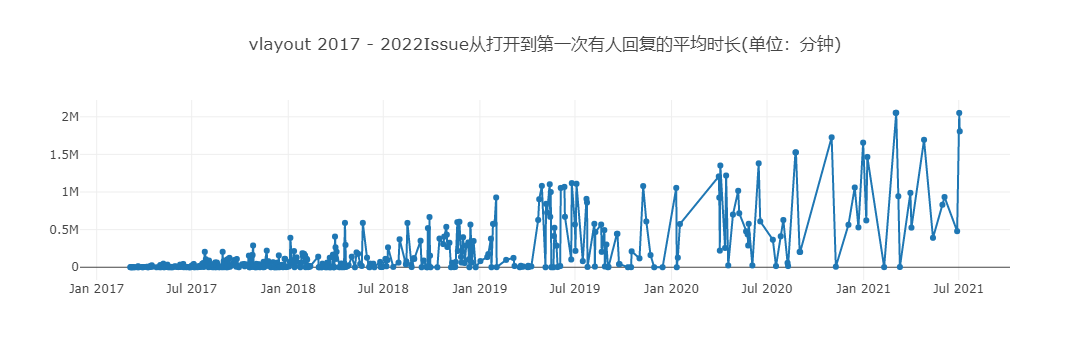

In [101]:
var startYear = 2017, endYear = 2022;
var years = [];
for (var y = startYear; y <= endYear; y++) years.push(y);
Promise.all(
    years.map(year => { return openDigger.driver.clickhouse.query(`
    select day, round(avg(time)/60, 2) time
    from 
    (
    select issue_id, formatDateTime(created_at, '%Y-%m-%d') day, min(issue_comment_created_at - issue_created_at) time
    from github_log.year${year}
    where repo_name = 'alibaba/vlayout'
    and type = 'IssueCommentEvent'
    and issue_comment_id != '0'

    group by formatDateTime(created_at, '%Y-%m-%d'), issue_id
    order by formatDateTime(created_at, '%Y-%m-%d') 
    )
    group by day
    order by day
    `                                                          
    )})
).then(
    data => {
    // console.log(data);
    data1 = data.reduce(function (a, b) { return a.concat(b)} );
    console.log(data1)
    openDigger.render.plotly([
        {y: data1.map(d => d.time), x: data1.map(d=>d.day), mode: 'lines+markers', name: 'activity'}
    ], {title: `vlayout ${startYear} - ${endYear}Issue从打开到第一次有人回复的平均时长(单位：分钟)`});  
})

### 7.2 Issue从打开到第一次有人回复时长的中位数

[
  { issue_id: '212022490', day: '2017-03-06', time: 153.1 },
  { issue_id: '212389222', day: '2017-03-07', time: 188.97 },
  { issue_id: '212389222', day: '2017-03-08', time: 1032.48 },
  { issue_id: '212981993', day: '2017-03-09', time: 170.92 },
  { issue_id: '213087013', day: '2017-03-10', time: 344.435 },
  { issue_id: '213277161', day: '2017-03-11', time: 1266.25 },
  { issue_id: '213667937', day: '2017-03-13', time: 43.385 },
  { issue_id: '214304632', day: '2017-03-15', time: 77.58 },
  { issue_id: '215326407', day: '2017-03-20', time: 76.48 },
  { issue_id: '212723652', day: '2017-03-21', time: 18632.12 },
  { issue_id: '215964832', day: '2017-03-22', time: 42.325 },
  { issue_id: '217423581', day: '2017-03-28', time: 217.62 },
  { issue_id: '217423581', day: '2017-03-29', time: 1436.225 },
  { issue_id: '217844549', day: '2017-03-30', time: 470.68 },
  { issue_id: '217844549', day: '2017-03-31', time: 2309.57 },
  { issue_id: '218094271', day: '2017-04-01', time: 2704.68 },


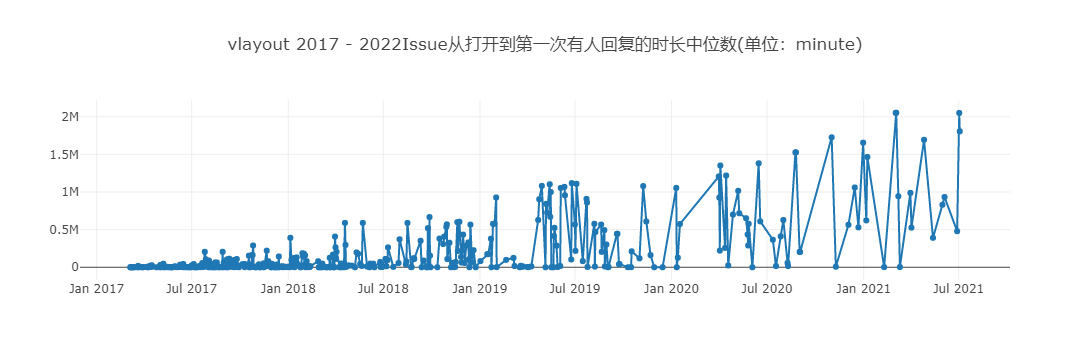

In [102]:
var startYear = 2017, endYear = 2022;
var years = [];
for (var y = startYear; y <= endYear; y++) years.push(y);
Promise.all(
    years.map(year => { return openDigger.driver.clickhouse.query(
    `
    select issue_id, formatDateTime(created_at, '%Y-%m-%d') day, round(min(issue_comment_created_at - issue_created_at)/60,2) time
    from github_log.year${year}
    where repo_name = 'alibaba/vlayout'
    and type = 'IssueCommentEvent'
    and issue_comment_id != '0'
    group by formatDateTime(created_at, '%Y-%m-%d'), issue_id
    order by formatDateTime(created_at, '%Y-%m-%d'), time 
    `                                                          
    )})
).then(
    data => {
    function sortArr(arr, str) {
        var _arr = [],
            _t = [],
            // 临时的变量
            _tmp;
        // 按照特定的参数将数组排序将具有相同值得排在一起
        arr = arr.sort(function(a, b) {
            var s = a[str],
                t = b[str];
            return s < t ? -1 : 1;
        });

        if ( arr.length ){
            _tmp = arr[0][str];
        }
        // 将相同类别的对象添加到统一个数组
        for (var i in arr) {
            if ( arr[i][str] === _tmp ){
                _t.push(arr[i]);
            } else {
                _tmp = arr[i][str];
                _arr.push(_t);
                _t = [arr[i]];
            }
        }
        // 将最后的内容推出新数组
        _arr.push( _t );
        return _arr;
    }
        
    function midNumber(binDimArr){
        var _arr = []
        var _tmp
        for (var i in binDimArr){
            var length = binDimArr[i].length
            if(length % 2 == 0){
                _tmp = binDimArr[i][Math.floor(length/2)]
                _tmp.time = (binDimArr[i][Math.floor(length/2)].time + binDimArr[i][Math.floor(length/2) - 1].time)/2
                _arr.push(_tmp)
            }else{
                _arr.push(binDimArr[i][Math.floor(length/2)])            
            }
        }
        return _arr
    }
    // console.log(data);
    data1 = data.reduce(function (a, b) { return a.concat(b)} );
    // console.log(data1)
    data2 = sortArr(data1, 'day')
    // console.log(data2)
    data3 = midNumber(data2)
    console.log(data3)
    openDigger.render.plotly([
        {y: data3.map(d => d.time), x: data3.map(d=>d.day), mode: 'lines+markers', name: 'activity'}
    ], {title: `vlayout ${startYear} - ${endYear}Issue从打开到第一次有人回复的时长中位数(单位：minute)`});  
})

### 7.3 PR从打开到第一次有人回复的平均时长

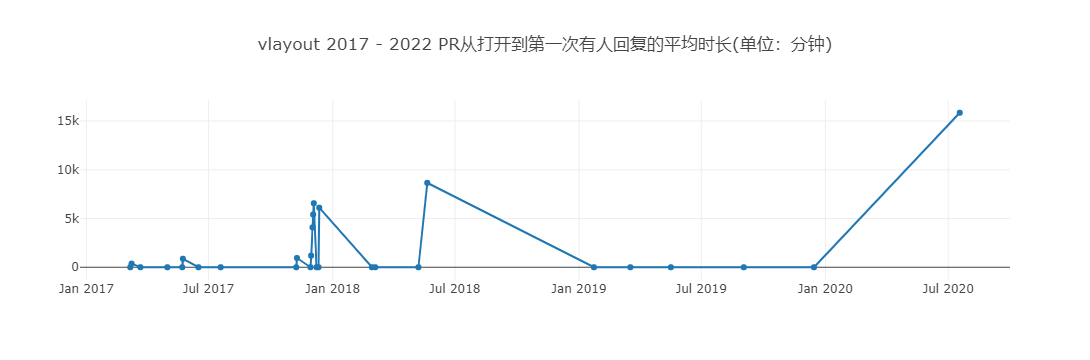

In [103]:
var startYear = 2017, endYear = 2022;
var years = [];
for (var y = startYear; y <= endYear; y++) years.push(y);
Promise.all(
    years.map(year => { return openDigger.driver.clickhouse.query(`
    select formatDateTime(created_at, '%Y-%m-%d') day, round(min(a.created_at - b.created_at)/60, 2) time
    from github_log.year${year} a
    right join 
    (
        select distinct issue_number, created_at 
        from github_log.year${year}
        where repo_name = 'alibaba/vlayout'
        and type = 'PullRequestEvent'
        and action = 'opened'
    ) b
    ON a.issue_number =  b.issue_number
    and a.repo_name = 'alibaba/vlayout'
    and a.type = 'IssueCommentEvent'
    group by formatDateTime(a.created_at, '%Y-%m-%d')
    order by formatDateTime(a.created_at, '%Y-%m-%d')
    `                                                          
    )})
).then(
    data => {
    // console.log(data);
    data1 = data.reduce(function (a, b) { return a.concat(b)} );
    // console.log(data1)
    openDigger.render.plotly([
        {y: data1.map(d => d.time), x: data1.map(d=>d.day), mode: 'lines+markers', name: 'activity'}
    ], {title: `vlayout ${startYear} - ${endYear} PR从打开到第一次有人回复的平均时长(单位：分钟)`});  
})

### 7.4 PR从打开到第一次有人回复时长的中位数

[
  { day: '2017-03-07', time: 0.47 },
  { day: '2017-03-09', time: 374.83 },
  { day: '2017-03-22', time: 1.02 },
  { day: '2017-05-01', time: 0.1 },
  { day: '2017-05-23', time: 0.1 },
  { day: '2017-05-24', time: 872.52 },
  { day: '2017-06-16', time: 0.12 },
  { day: '2017-07-19', time: 0.1 },
  { day: '2017-11-08', time: 0.1 },
  { day: '2017-11-09', time: 949.8 },
  { day: '2017-11-29', time: 0.1 },
  { day: '2017-11-30', time: 1192.03 },
  { day: '2017-12-02', time: 4086.95 },
  { day: '2017-12-03', time: 5405.72 },
  { day: '2017-12-04', time: 6568.6 },
  { day: '2017-12-08', time: 0.08 },
  { day: '2017-12-11', time: 0.1 },
  { day: '2017-12-12', time: 6112.43 },
  { day: '2018-02-28', time: 0.1 },
  { day: '2018-03-05', time: 0.1 },
  { day: '2018-05-08', time: 0.1 },
  { day: '2018-05-21', time: 8661.08 },
  { day: '2019-01-23', time: 0.17 },
  { day: '2019-03-18', time: 0.1 },
  { day: '2019-05-17', time: 0.15 },
  { day: '2019-09-02', time: 0.08 },
  { day: '2019-12-15', t

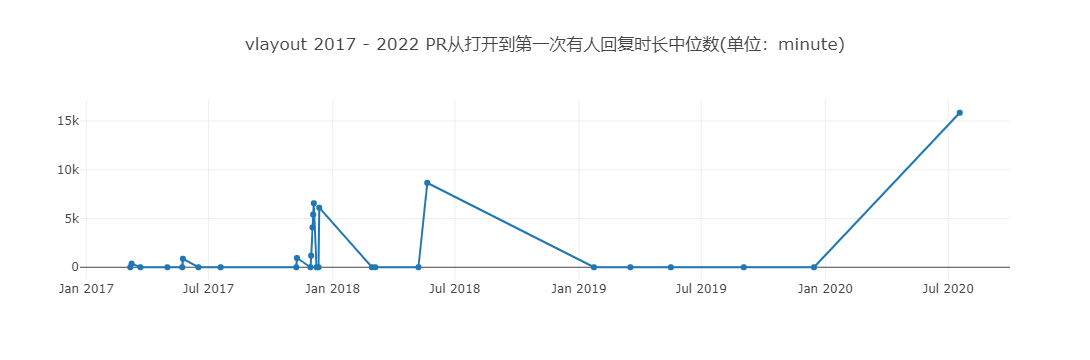

In [104]:
var startYear = 2017, endYear = 2022;
var years = [];
for (var y = startYear; y <= endYear; y++) years.push(y);
Promise.all(
    years.map(year => { return openDigger.driver.clickhouse.query(
    `
    select formatDateTime(created_at, '%Y-%m-%d') day, round(min(a.created_at - b.created_at)/60, 2) time
    from github_log.year${year} a
    right join 
    (
        select distinct issue_number, created_at 
        from github_log.year${year}
        where repo_name = 'alibaba/vlayout'
        and type = 'PullRequestEvent'
        and action = 'opened'
    ) b
    ON a.issue_number =  b.issue_number
    and a.repo_name = 'alibaba/vlayout'
    and a.type = 'IssueCommentEvent'
    group by formatDateTime(a.created_at, '%Y-%m-%d')
    order by formatDateTime(a.created_at, '%Y-%m-%d'), time
    `                                                          
    )})
).then(
    data => {
     function sortArr(arr, str) {
        var _arr = [],
            _t = [],
            // 临时的变量
            _tmp;
        // 按照特定的参数将数组排序将具有相同值得排在一起
        arr = arr.sort(function(a, b) {
            var s = a[str],
                t = b[str];
            return s < t ? -1 : 1;
        });

        if ( arr.length ){
            _tmp = arr[0][str];
        }
        // 将相同类别的对象添加到统一个数组
        for (var i in arr) {
            if ( arr[i][str] === _tmp ){
                _t.push(arr[i]);
            } else {
                _tmp = arr[i][str];
                _arr.push(_t);
                _t = [arr[i]];
            }
        }
        // 将最后的内容推出新数组
        _arr.push( _t );
        return _arr;
    }
        
    function midNumber(binDimArr){
        var _arr = []
        var _tmp
        for (var i in binDimArr){
            var length = binDimArr[i].length
            if(length % 2 == 0){
                _tmp = binDimArr[i][Math.floor(length/2)]
                _tmp.time = (binDimArr[i][Math.floor(length/2)].time + binDimArr[i][Math.floor(length/2) - 1].time)/2
                _arr.push(_tmp)
            }else{
                _arr.push(binDimArr[i][Math.floor(length/2)])            
            }
        }
        return _arr
    }
    // console.log(data);
    data1 = data.reduce(function (a, b) { return a.concat(b)} );
    // console.log(data1)
    data2 = sortArr(data1, 'day')
    // console.log(data2)
    data3 = midNumber(data2)
    console.log(data3)
    openDigger.render.plotly([
        {y: data1.map(d => d.time), x: data1.map(d=>d.day), mode: 'lines+markers', name: 'activity'}
    ], {title: `vlayout ${startYear} - ${endYear} PR从打开到第一次有人回复时长中位数(单位：minute)`});  
})